## Skin Cancer Classification using VGG19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
image = 'train'

In [3]:
# Path to the data directory
data_dir = os.path.join(os.getcwd(), 'data', image)
 

In [4]:
print('Number of images in each folder:')
for folder in os.listdir(image):
    print(folder, len(os.listdir(os.path.join(image, folder))))


Number of images in each folder:
benign 1440
malignant 1197


In [5]:
df = pd.DataFrame(columns=['image', 'label'])
for folder in os.listdir(image):
    for file in os.listdir(os.path.join(image, folder)):
        df = df.append({'image': file, 'label': folder}, ignore_index=True)
df.head()


C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

image   label
0   100.jpg  benign
1  1000.jpg  benign
2  1001.jpg  benign
3  1002.jpg  benign
4  1004.jpg  benign

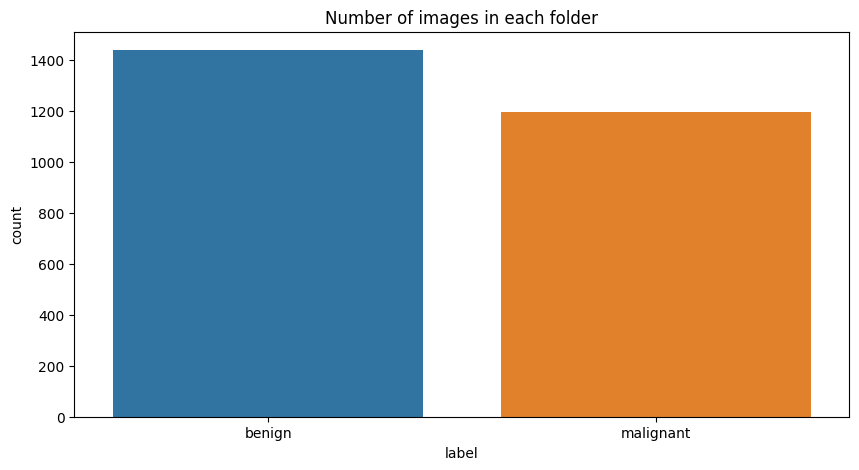

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.title('Number of images in each folder')
plt.show()


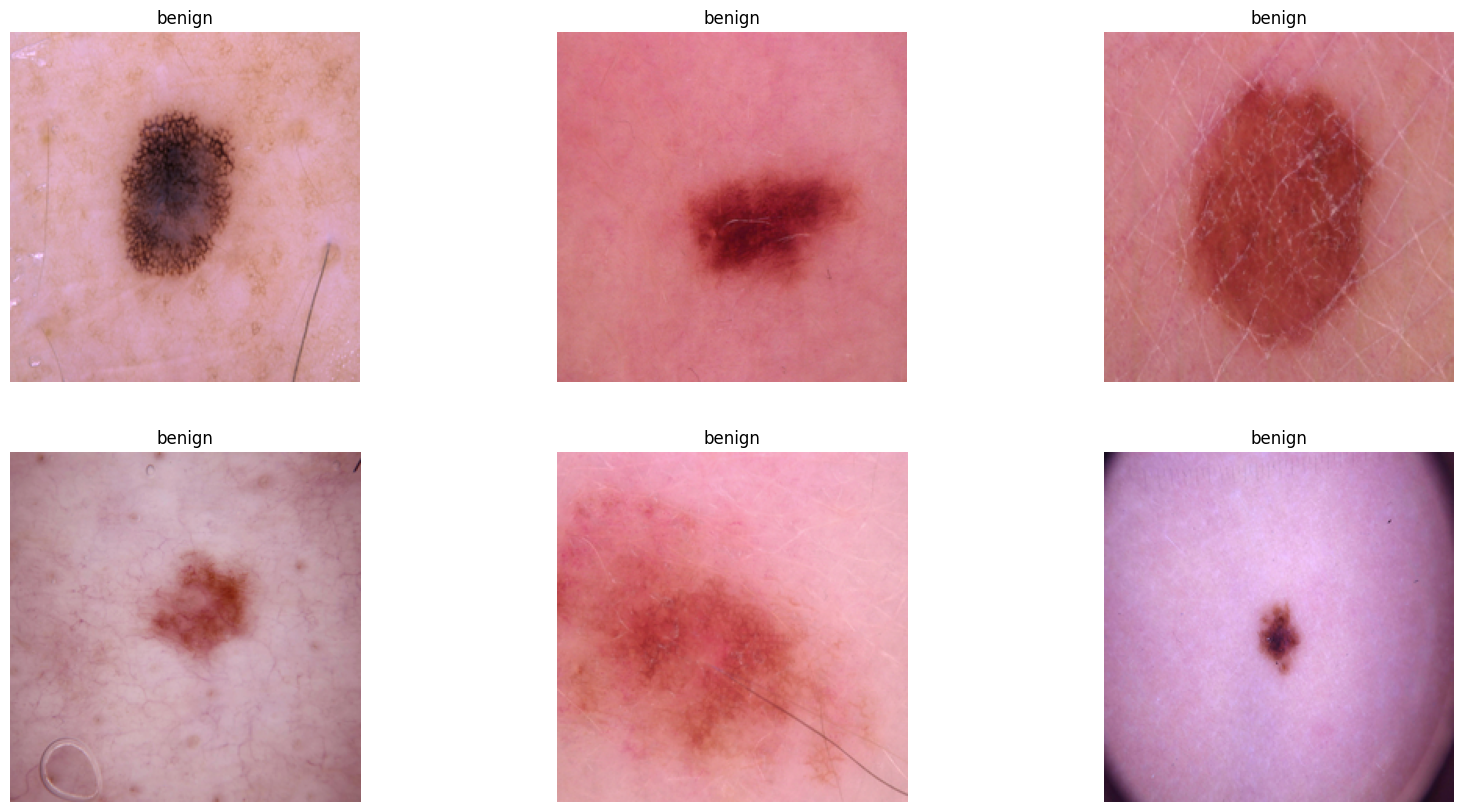

In [8]:
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i, 1], df.iloc[i, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i, 1])
    plt.axis('off')


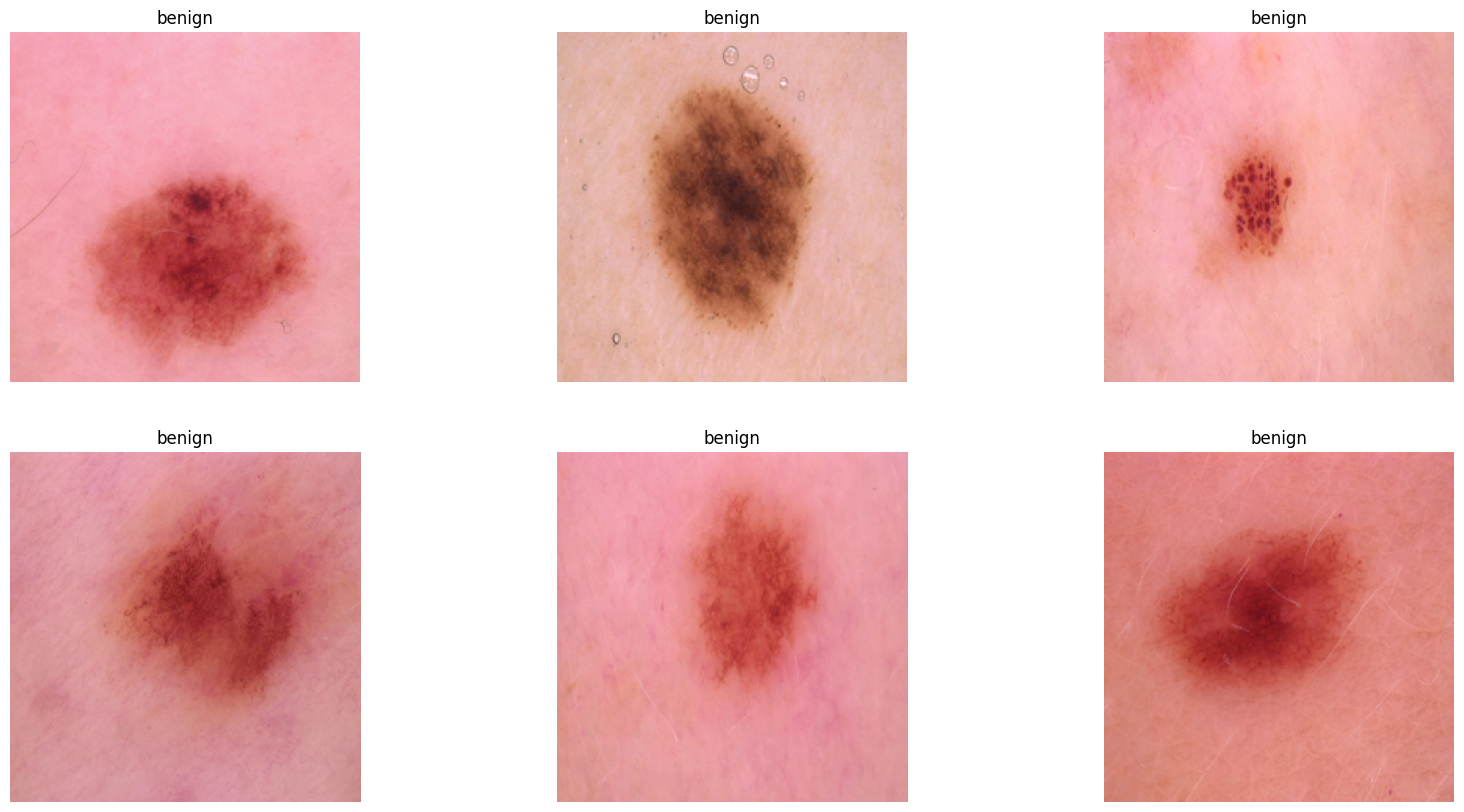

In [7]:
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i+6, 1], df.iloc[i+6, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i+6, 1])
    plt.axis('off')


In [8]:
# Data preprocessing from cell_images folder
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


In [9]:
# VGG19 model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3),
          activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [10]:
# Training the model using cell_images folder
train_generator = train_datagen.flow_from_directory(image,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 2637 images belonging to 2 classes.


In [11]:
# Training the model
history = model.fit_generator(train_generator,
                                epochs=10,
                                steps_per_epoch=100,
                                validation_steps=50)

C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\3989013709.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
  9/100 [=>............................] - ETA: 1:02:15 - loss: 2.1711 - accuracy: 0.5625

In [ ]:
# Resize the images
from PIL import Image
import glob
import os


def resize_images():
    for filename in glob.glob('cell_images/Parasitized/*.png'):
        im = Image.open(filename)
        imResize = im.resize((224, 224), Image.ANTIALIAS)
        imResize.save(filename, 'PNG', quality=90)

    for filename in glob.glob('cell_images/Uninfected/*.png'):
        im = Image.open(filename)
        imResize = im.resize((224, 224), Image.ANTIALIAS)
        imResize.save(filename, 'PNG', quality=90)


In [ ]:
# Testing the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('cell_images',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')


In [ ]:
# Predict the image
img = plt.imread(
    'cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    'cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0
print(img.shape)

# Predict the image
pred = model.predict(img)
print(pred)


In [ ]:
# predict the image if else
if pred > 0.5:
    print('Parasitized')
else:
    print('Uninfected')


In [3]:
# Save the model
model.save('Skin_VGG19.h5')


NameError: name 'model' is not defined

In [ ]:
# Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Resnet50

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
image = ('train')


In [6]:
# Create a data generator for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a training set
train_set = train_datagen.flow_from_directory(
    'Pneumonia', target_size=(224, 224), batch_size=32, class_mode='binary')

# Create a validation set
val_set = val_datagen.flow_from_directory(
    'Pneumonia', target_size=(224, 224), batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [7]:
# Create a ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(224, 224, 3))


In [8]:
# Freeze the layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# Create a model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Create a checkpoint
checkpoint = ModelCheckpoint('Pneumonia_Resnet50.h5', monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

# Create an early stopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0,
                      patience=10, verbose=1, mode='auto')


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Train the model
history = model.fit(train_set, validation_data=val_set,
                    epochs=50, callbacks=[checkpoint, early])


Epoch 1/50
 22/163 [===>..........................] - ETA: 13:53 - loss: 0.5920 - accuracy: 0.7202

In [ ]:
# Accuracy print
print('Accuracy of the model is - ', model.evaluate(val_set)[1]*100, '%')


In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')


In [ ]:
# Save the model
model.save('Skin_Resnet50.h5')


### EfficientNet-B7

In [1]:
#EfficientNet-B7
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [2]:
image = ('train')


In [3]:
# EfficientNet-B7
IMG_SIZE = 600
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)


In [4]:
# Training data
train_generator = train_datagen.flow_from_directory(
    'Pneumonia',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')


Found 4173 images belonging to 2 classes.


In [5]:
# Validation data
validation_generator = train_datagen.flow_from_directory(
    'Pneumonia',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')


Found 1043 images belonging to 2 classes.


In [7]:
# Create the base model from the pre-trained model EfficientNetB7
base_model = EfficientNetB7(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                            include_top=False,
                            weights='imagenet')


In [8]:
# Freeze the base model
base_model.trainable = False


In [9]:
# Create new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])


In [10]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 19, 19, 2560)     64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2561      
                                                                 
Total params: 64,100,248
Trainable params: 2,561
Non-trainable params: 64,097,687
_________________________________________________________________


In [12]:
# Callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


In [13]:
# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[earlystop, learning_rate_reduction])


Epoch 1/20


In [ ]:
# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the model
model.save('Skin_Efficientnet-B7.h5')
